### Compare numerical model outputs from two different transfer functions ($T_x$) against analytical solutions.
---
* __author__ = Chakraborty, S.
* __copyright__ = 
* __credits__ = []
* __license__ = MIT
* __version__ = 1.0
* __maintainer__ = Chakraborty, S.
* __email__ = shibaji7@vt.edu
* __status__ = Research

> Parameters for this simulation are described in the input control json object 'ICJ' 

In [1]:
# Import all required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
plt.style.use(["science", "ieee"])
from gic.model.oml import OceanModel
from gic.model.cables import Cable, TheoriticalSolver
from gic.model.utils import RecursiveNamespace, frexp102str
from gic.validation.simulate_synB_synT import SytheticCableAnalysis

from scipy.stats import pearsonr
%matplotlib inline

In [2]:
# Input Control JSON for uniform Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": { # Describe synthetic B-field structure
            "Am": [ 200, 90, 30, 17, 8, 3.5 ], # Magnitudes of different phase components
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ], # Periods (frequency)) of different phase components
            "Phim": [ 10, 20, 30, 40, 50, 60 ], # Phase (lag/lead) of different phase components
            "T_hours": 72 # Time series of B-field length
        },
        "tapering": 0.1 # Tapering coefficient
    },
    "cable": { # Cable description
        "cable_sections": [ # Description of cable sections
            {
                "sec_id": None,
                "len_km": 1000, # Length of the cable
                "elec_params": {
                    "earth_model": "U", # Uniform Earth model stored in 'config/conductivity.json'
                    "ocean_depth": 4000, # Ocean depth in meters
                    "ocean_resistivity": 0.3 # Ocean resistivity
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/", # Output directory
    "opname": "Synthetic-B"
}
scas = []
control = RecursiveNamespace(**ICJ)
sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
sca.run()
scas.append(sca)

# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {# Describe synthetic B-field structure
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],# Magnitudes of different phase components
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],# Periods (frequency)) of different phase components
            "Phim": [ 10, 20, 30, 40, 50, 60 ],# Phase (lag/lead) of different phase components
            "T_hours": 72# Time series of B-field length
        },
        "tapering": 0.1# Tapering coefficient
    },
    "cable": {# Cable description
        "cable_sections": [ # Description of cable sections
            {
                "sec_id": None,
                "len_km": 1000,# Length of the cable
                "elec_params": {
                    "earth_model": "DB1", # Earth model stored in 'config/conductivity.json'
                    "ocean_depth": 4000,# Ocean depth in meters
                    "ocean_resistivity": 0.3# Ocean resistivity
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",# Output directory
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
#sca.run()
#scas.append(sca)

# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {# Describe synthetic B-field structure
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],# Magnitudes of different phase components
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],# Periods (frequency)) of different phase components
            "Phim": [ 10, 20, 30, 40, 50, 60 ],# Phase (lag/lead) of different phase components
            "T_hours": 72# Time series of B-field length
        },
        "tapering": 0.1# Tapering coefficient
    },
    "cable": {# Cable description
        "cable_sections": [ # Description of cable sections
            {
                "sec_id": None,
                "len_km": 1000,# Length of the cable
                "elec_params": {
                    "earth_model": "FT1",# Earth model stored in 'config/conductivity.json'
                    "ocean_depth": 4000,# Ocean depth in meters
                    "ocean_resistivity": 0.3# Ocean resistivity
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",# Output directory
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
sca.run()
scas.append(sca)

2022-09-06 14:38:34.785 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-09-06 14:38:34.786 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-09-06 14:38:34.862 | INFO     | gic.model.oml:__init__:46 - Compile OM[U] to calc O(floor) E- and B-Fields
2022-09-06 14:38:34.865 | INFO     | gic.validation.simulate_synB_synT:run:98 - Synthetic B U->OM(U)
2022-09-06 14:38:35.262 | INFO     | gic.validation.simulate_synB_synT:check_analytical_numerical:226 - Corr(Eanl,Enum): 0.9999979248
2022-09-06 14:38:41.697 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-09-06 14:38:41.698 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-09-06 14:38:41.698 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-09-06 14:38:41.761 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fiel

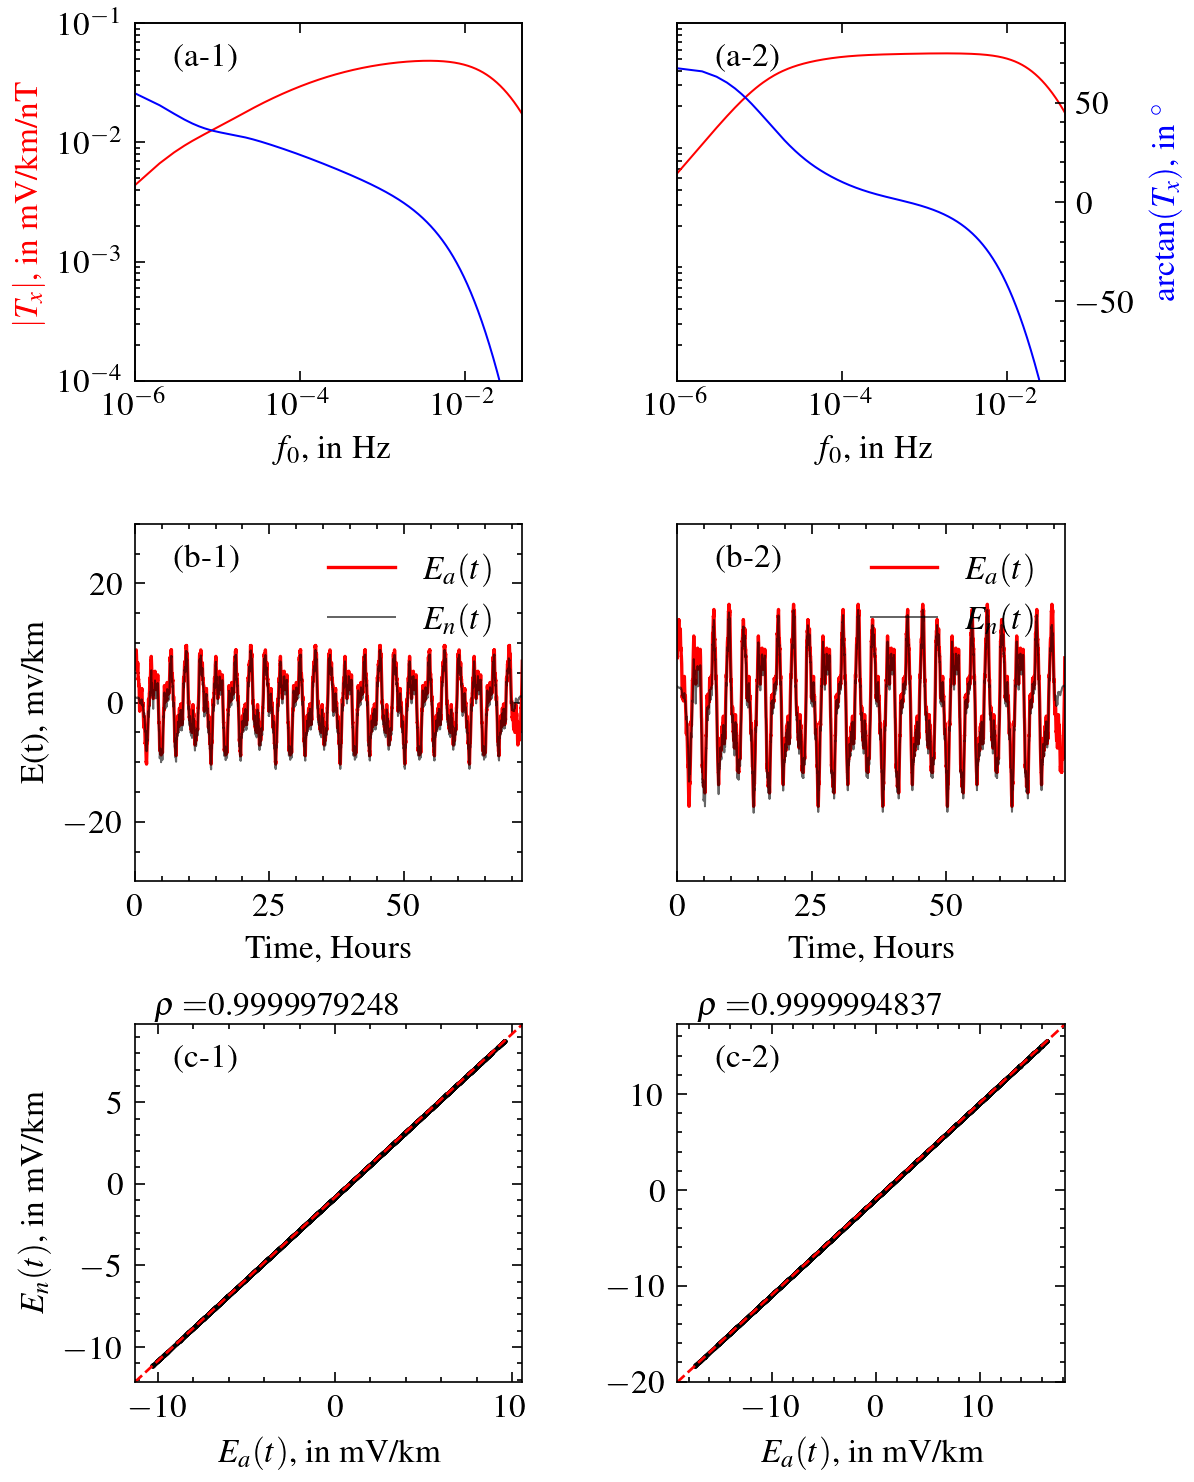

In [3]:
# Comparitive plot B and induced E-fields from 1D calculation

fig = plt.figure(dpi=240, figsize=(5,7.5))
labels = ["(a-1)", "(a-2)"]
for i in range(2):
    ax = fig.add_subplot(321+i)
    om = scas[i].cable.cable_sections[0].cs_oml
    Tx = om.get_TFs()
    ax.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6)
    ax.set_xlabel(r"$f_0$, in Hz")
    if i==0: ax.set_ylabel(r"$|T_x|$, in mV/km/nT", color="r")
    else: ax.set_yticks([])
    ax.text(0.1, 0.9, labels[i], va="center", ha="left", transform=ax.transAxes)
    ax.set_ylim(1e-4,1e-1)
    axt = ax.twinx()
    axt.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6)
    axt.set_ylim(-90,90)
    if i==1: 
        axt.set_ylabel(r"$\arctan(T_x)$, in $^\circ$", color="b")
    else: axt.set_yticks([])
    axt.set_ylim(-90, 90)    
    _ = axt.set_xlim(1e-6,5e-2)
    
labels = ["(b-1)", "(b-2)"]
for i in range(2):
    ax = fig.add_subplot(323+i)
    Eanl = scas[i].cable.cable_sections[0].cs_Eanl_syn
    Enum = scas[i].cable.cable_sections[0].cs_Enum_syn
    ax.plot(Eanl.dTime/3600., Eanl.X, "r", ls="-", lw=1., label=r"$E_a(t)$")
    ax.plot(Enum.dTime/3600., Enum.X, "k", ls="-", lw=0.6, label=r"$E_n(t)$", alpha=0.6)
    ax.set_xlabel("Time, Hours")
    if i==0: ax.set_ylabel("E(t), mv/km")
    else: ax.set_yticks([])
    ax.text(0.1, 0.9, labels[i], va="center", ha="left", transform=ax.transAxes)
    ax.legend(loc=1)
    ax.set_xlim(0,72)
    ax.set_ylim(-30, 30)
    
labels = ["(c-1)", "(c-2)"]
for i in range(2):
    ax = fig.add_subplot(325+i)
    Eanl = scas[i].cable.cable_sections[0].cs_Eanl_syn
    Enum = scas[i].cable.cable_sections[0].cs_Enum_syn
    r = scas[i].cable.cable_sections[0].cs_r_syn
    L = int(len(Eanl)/3)
    Ea, En = Eanl.X.tolist()[L:-L], Enum.X.tolist()[L:-L]
    ax.plot(Ea, En, "ko", ms=0.1, alpha=0.4)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="r", ls="--", lw=0.8)
    ax.text(0.05, 1.05, r"$\rho=$%.10f" % r, va="center", ha="left", transform=ax.transAxes)
    ax.text(0.1, 0.9, labels[i], va="center", ha="left", transform=ax.transAxes)
    ax.set_xlabel(r"$E_a(t)$, in mV/km")
    if i==0: ax.set_ylabel(r"$E_n(t)$, in mV/km")
    #else: ax.set_yticks([])
    #ax.set_ylim(-20, 20)
    #ax.set_xlim(-20, 20)

fig.subplots_adjust(wspace=0.4, hspace=0.4) 